# SPH Method

In [18]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# load dataset
data = pd.read_csv('sph_dataset.csv')

In [20]:
data.describe()

,Name,Angular_Velocity_Z_Component,Velocity_2_Z_Component,Total_Deformation_Maximum,Equivalent_Stress_Maximum,Energy_Probe_Maximum_Total
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,25.000000,520.000000,-185.000000,0.418431,1.156907e+09,1.863810e+06
std,14.866069,74.330344,37.165172,0.059342,7.690064e+07,5.306435e+05
min,0.000000,395.000000,-247.500000,0.320000,9.654931e+08,1.044617e+06
25%,12.500000,457.500000,-216.250000,0.370000,1.133473e+09,1.408042e+06
50%,25.000000,520.000000,-185.000000,0.420000,1.165263e+09,1.825960e+06
75%,37.500000,582.500000,-153.750000,0.470000,1.206951e+09,2.298561e+06
max,50.000000,645.000000,-122.500000,0.520000,1.263824e+09,2.825661e+06


# Colinearity test

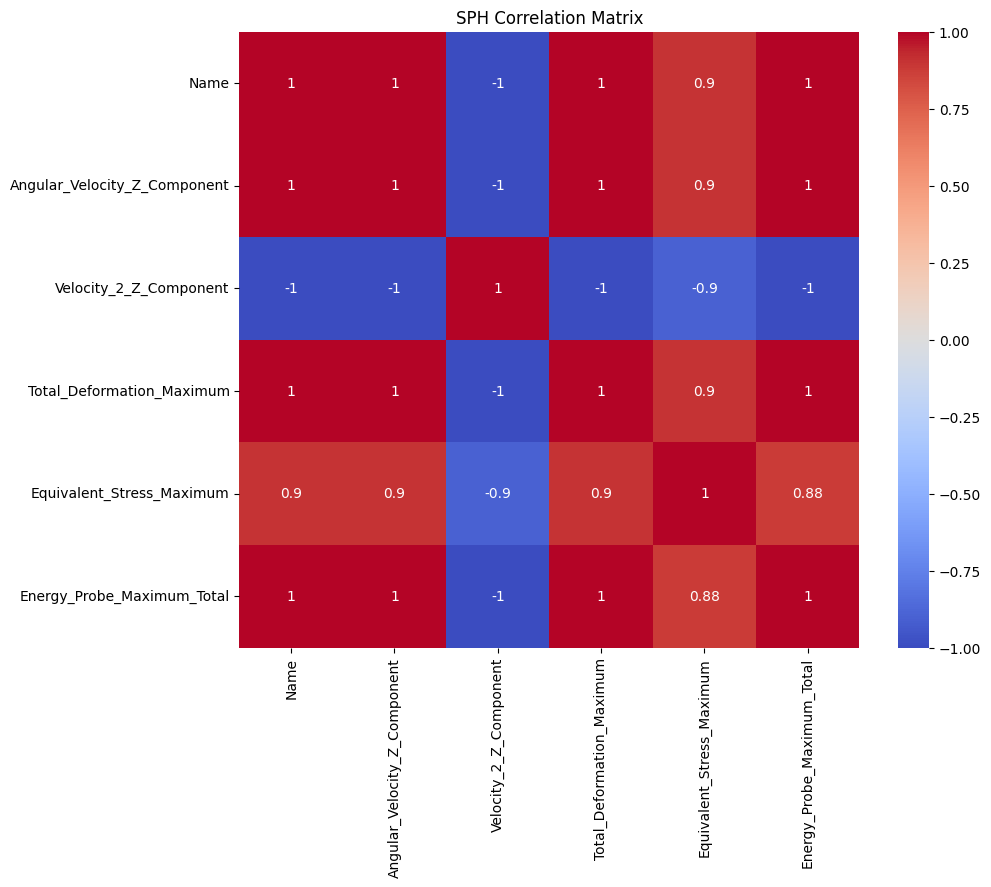

In [21]:
# plot to check colinearity matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('SPH Correlation Matrix')
plt.show()

In [22]:
# create a new data frame excluding the name column
df_new = data.drop('Name', axis=1)


In [23]:
df_new.head()

,Angular_Velocity_Z_Component,Velocity_2_Z_Component,Total_Deformation_Maximum,Equivalent_Stress_Maximum,Energy_Probe_Maximum_Total
0,395,-122.5,0.32,9.654931e+08,1044616.68
1,400,-125.0,0.32,9.882366e+08,1071678.09
2,405,-127.5,0.33,9.851702e+08,1099089.05
3,410,-130.0,0.33,9.985108e+08,1126849.09
4,415,-132.5,0.33,1.025123e+09,1154959.66


# checkin the condition of the graph

In [24]:
# # plots to see the distributions
# # plot Total_Deformation_Maximum
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Total_Deformation_Maximum'], c='g', marker='o')
# ax.set_title('Total_Deformation_Maximum')
# ax.set_xlabel('Angular_Velocity_Z_Component')
# ax.set_ylabel('Velocity_2_Z_Component')
# ax.set_zlabel('Total_Deformation_Maximum')
# plt.show()

# # plot Equivalent_Stress_Maximum
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Equivalent_Stress_Maximum'], c='b', marker='o')
# ax.set_title('Equivalent_Stress_Maximum')
# ax.set_xlabel('Angular_Velocity_Z_Component')
# ax.set_ylabel('Velocity_2_Z_Component')
# ax.set_zlabel('Equivalent_Stress_Maximum')
# plt.show()

# # plot Energy_Probe_Maximum_Total
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Energy_Probe_Maximum_Total'], c='r', marker='o')
# ax.set_title('Energy_Probe_Maximum_Total')
# ax.set_xlabel('Angular_Velocity_Z_Component')
# ax.set_ylabel('Velocity_2_Z_Component')
# ax.set_zlabel('Energy_Probe_Maximum_Total')
# plt.show()

In [25]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # 1. Total Deformation Plot
# fig1 = go.Figure(data=[go.Scatter3d(
#     x=df_new['Angular_Velocity_Z_Component'],
#     y=df_new['Velocity_2_Z_Component'],
#     z=df_new['Total_Deformation_Maximum'],
#     mode='markers',
#     marker=dict(size=5, color='green', opacity=0.8)
# )])
# fig1.update_layout(title='3D: Total Deformation vs Velocity Components',
#                   scene=dict(xaxis_title='Angular Velocity',
#                              yaxis_title='Velocity Z component',
#                              zaxis_title='Total Deformation'))
# fig1.show()

# # 2. Equivalent Stress Plot
# fig2 = go.Figure(data=[go.Scatter3d(
#     x=df_new['Angular_Velocity_Z_Component'],
#     y=df_new['Velocity_2_Z_Component'],
#     z=df_new['Equivalent_Stress_Maximum'],
#     mode='markers',
#     marker=dict(size=5, color='blue', opacity=0.8)
# )])
# fig2.update_layout(title='3D: Equivalent Stress vs Velocity Components',
#                   scene=dict(xaxis_title='Angular Velocity',
#                              yaxis_title='Velocity Z component',
#                              zaxis_title='Equivalent Stress'))
# fig2.show()

# # 3. Energy Probe Plot
# fig3 = go.Figure(data=[go.Scatter3d(
#     x=df_new['Angular_Velocity_Z_Component'],
#     y=df_new['Velocity_2_Z_Component'],
#     z=df_new['Energy_Probe_Maximum_Total'],
#     mode='markers',
#     marker=dict(size=5, color='red', opacity=0.8)
# )])
# fig3.update_layout(title='3D: Energy Probe vs Velocity Components',
#                   scene=dict(xaxis_title='Angular Velocity',
#                              yaxis_title='Velocity Z component',
#                              zaxis_title='Energy Probe'))
# fig3.show()

In [31]:
X = df_new[['Angular_Velocity_Z_Component','Velocity_2_Z_Component']]
y = pd.DataFrame({
    'total_deformation': df_new['Total_Deformation_Maximum'],
    'equivalant_stress': df_new['Equivalent_Stress_Maximum'] / 1e6,
    'energy_probe': df_new['Energy_Probe_Maximum_Total'] / 1000
}) # Convert to kJ

# Random Forest

In [32]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np



# X = df_new[['Angular_Velocity_Z_Component','Equivalent_Stress_Maximum']]
# y = df_new['Total_Deformation_Maximum']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# rf_model = RandomForestRegressor(
#     n_estimators=25,
#     random_state=42,
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     max_features='sqrt'
# )

# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Random Forest Regression Results:")
# print(f"RMSE : {rmse:.4f}")
# print(f"R²   : {r2:.4f}")
# print(f"MSE  : {mse:.4f}")

# print ("\n k mean cross validation \n")

# # Do K mean cross validation
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# rmse_list = []
# for train_index, test_index in kf.split(X):
#     X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#     y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
#     rf_model_kf = RandomForestRegressor(
#     n_estimators=25,
#     random_state=42,
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     max_features='sqrt'
#     )
    
#     rf_model_kf.fit(X_train_kf, y_train_kf)
#     y_pred_kf = rf_model_kf.predict(X_test_kf)
    
#     mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
#     r2_kf = r2_score(y_test_kf, y_pred_kf)
#     rmse_kf = np.sqrt(mse_kf)
#     rmse_list.append(rmse_kf)
# average_rmse = np.mean(rmse_list)
# print(f"Average RMSE from K-Fold CV: {average_rmse:.4f}")
# print(f"RMSEs from each fold: {rmse_list}")
# print(f"R²   : {r2_kf:.4f}")
# print(f"MSE  : {mse_kf:.4f}")

# # At fold 4 :
# # likely at very high or very low speeds the model finds harder to predict.

# # Feature imporatnace in number format
# importances = rf_model_kf.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# print("\nFeature Importances:")
# print(feature_importance_df)



# SVR with RBF

In [33]:

# # SVR only supports single-output regression, so we fit one model per target

# X = df_new[['Angular_Velocity_Z_Component','Equivalent_Stress_Maximum']]
# y = pd.DataFrame({
#     'Total_Deformation_Maximum': df_new['Total_Deformation_Maximum'],
#     'Equivalent_Stress_Maximum': df_new['Equivalent_Stress_Maximum'] / 1e6,
#     'Energy_Probe_Maximum_Total': df_new['Energy_Probe_Maximum_Total'] / 1000
# }) # Convert to kJ

# targets = y.columns
# results = {}

# for target in targets:
#     # Split data into training and testing sets for this target
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     X_train_scaled = StandardScaler().fit_transform(X_train)
#     X_test_scaled = StandardScaler().fit_transform(X_test)

#     y_train_target = y_train[target]
#     y_test_target = y_test[target]

#     # Train SVR model
#     model = SVR(kernel='rbf', C=160, gamma= 0.1, epsilon=0.1)
#     model.fit(X_train_scaled, y_train_target)

#     # Make predictions
#     y_pred = model.predict(X_test_scaled)

#     # Evaluate model
#     mse_svr = mean_squared_error(y_test_target, y_pred)
#     rmse_svr = np.sqrt(mse_svr)
#     r2_svr = r2_score(y_test_target, y_pred)

#     print(f"\nResults for {target}:")
#     print(f'Mean Squared Error: {mse_svr:.4f}')
#     print(f'RMSE: {rmse_svr:.4f}')
#     print(f'R² Score: {r2_svr:.4f}')

#     # K-Fold cross-validation for SVR
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     rmse_list_svr = []
#     for train_index, test_index in kf.split(X):
#         X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#         y_train_kf = y.iloc[train_index][target]
#         y_test_kf = y.iloc[test_index][target]

#         # Standardize features for each fold
#         scaler_kf = StandardScaler()
#         X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
#         X_test_kf_scaled = scaler_kf.transform(X_test_kf)

#         svr_model_kf = SVR(kernel='rbf', C=160, gamma=1, epsilon=0.1)
#         svr_model_kf.fit(X_train_kf_scaled, y_train_kf)
#         y_pred_kf_svr = svr_model_kf.predict(X_test_kf_scaled)

#         mse_kf_svr = mean_squared_error(y_test_kf, y_pred_kf_svr)
#         rmse_kf_svr = np.sqrt(mse_kf_svr)
#         rmse_list_svr.append(rmse_kf_svr)
#         r2_kf_svr = r2_score(y_test_kf, y_pred_kf_svr)

#     average_rmse_svr = np.mean(rmse_list_svr)
#     print(f"Average MSE from K-Fold CV (SVR): {average_rmse_svr:.4f}")
#     print(f"MSEs from each fold (SVR): {rmse_list_svr}")
#     print(f"K fold R²   : {r2_kf_svr:.4f}")
#     print(f"K fold MSE  : {mse_kf_svr:.4f}")

# # Feature importance is not directly available for SVR models

# Poly Regression

In [34]:
# # polynomial regression only supports single-output regression, so we fit one model per target
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# targets = y.columns
# for target in targets:
#     # Split data into training and testing sets for this target
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#     X_train_scaled = StandardScaler().fit_transform(X_train)
#     X_test_scaled = StandardScaler().fit_transform(X_test)

#     y_train_target = y_train[target]
#     y_test_target = y_test[target]

#     # Create polynomial features
#     poly = PolynomialFeatures(degree=2)
#     X_train_poly = poly.fit_transform(X_train_scaled)
#     X_test_poly = poly.transform(X_test_scaled)

#     # Train polynomial regression model
#     model = LinearRegression()
#     model.fit(X_train_poly, y_train_target)

#     # Make predictions
#     y_pred = model.predict(X_test_poly)

#     # Evaluate model
#     mse_poly = mean_squared_error(y_test_target, y_pred)
#     rmse_poly = np.sqrt(mse_poly)
#     r2_poly = r2_score(y_test_target, y_pred)

#     print(f"\nPolynomial Regression Results for {target}:")
#     print(f'Mean Squared Error: {mse_poly:.4f}')
#     print(f'RMSE: {rmse_poly:.4f}')
#     print(f'R² Score: {r2_poly:.4f}')
#     # K-Fold cross-validation for Polynomial Regression
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     rmse_list_poly = []
#     for train_index, test_index in kf.split(X):
#         X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#         y_train_kf = y.iloc[train_index][target]
#         y_test_kf = y.iloc[test_index][target]

#         # Standardize features for each fold
#         scaler_kf = StandardScaler()
#         X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
#         X_test_kf_scaled = scaler_kf.transform(X_test_kf)

#         # Create polynomial features
#         poly_kf = PolynomialFeatures(degree=2)
#         X_train_kf_poly = poly_kf.fit_transform(X_train_kf_scaled)
#         X_test_kf_poly = poly_kf.transform(X_test_kf_scaled)

#         poly_model_kf = LinearRegression()
#         poly_model_kf.fit(X_train_kf_poly, y_train_kf)
#         y_pred_kf_poly = poly_model_kf.predict(X_test_kf_poly)

#         mse_kf_poly = mean_squared_error(y_test_kf, y_pred_kf_poly)
#         rmse_kf_poly = np.sqrt(mse_kf_poly)
#         rmse_list_poly.append(rmse_kf_poly)
#         r2_kf_poly = r2_score(y_test_kf, y_pred_kf_poly)
#     average_rmse_poly = np.mean(rmse_list_poly)
#     print(f"Average MSE from K-Fold CV (Polynomial Regression): {average_rmse_poly:.4f}")
#     print(f"MSEs from each fold (Polynomial Regression): {rmse_list_poly}")
#     print(f"K fold R²   : {r2_kf_poly:.4f}")
#     print(f"K fold MSE  : {mse_kf_poly:.4f}")

    

# XGBoost

In [36]:
# XGBoost only supports single-output regression, so we fit one model per target
import xgboost as xgb
from sklearn.model_selection import KFold

targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Train XGBoost model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=25,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    model.fit(X_train_scaled, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate model
    mse_xgb = mean_squared_error(y_test_target, y_pred)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test_target, y_pred)

    print(f"\nXGBoost Results for {target}:")
    print(f'Mean Squared Error: {mse_xgb:.4f}')
    print(f'RMSE: {rmse_xgb:.4f}')
    print(f'R² Score: {r2_xgb:.4f}')
    # K-Fold cross-validation for XGBoost
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_xgb = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        xgb_model_kf = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=25,
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        )
        xgb_model_kf.fit(X_train_kf_scaled, y_train_kf)
        y_pred_kf_xgb = xgb_model_kf.predict(X_test_kf_scaled)

        mse_kf_xgb = mean_squared_error(y_test_kf, y_pred_kf_xgb)
        rmse_kf_xgb = np.sqrt(mse_kf_xgb)
        rmse_list_xgb.append(rmse_kf_xgb)
        average_rmse_xgb = np.mean(rmse_list_xgb)
        r2_kf_xgb = r2_score(y_test_kf, y_pred_kf_xgb)

    print(f"Average MSE from K-Fold CV (XGBoost): {average_rmse_xgb:.4f}")
    print(f"MSEs from each fold (XGBoost): {rmse_list_xgb}")
    print(f"K fold R²   : {r2_kf_xgb:.4f}")
    print(f"K fold MSE  : {mse_kf_xgb:.4f}")
    
# Feature importance for XGBoost
    importance = model.feature_importances_
    feature_names = X.columns
    feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
    print("\nXGBoost Feature Importances:")
    print(feature_importance_df_xgb)

    


XGBoost Results for total_deformation:
Mean Squared Error: 0.0014
RMSE: 0.0368
R² Score: 0.3459
Average MSE from K-Fold CV (XGBoost): 0.0098
MSEs from each fold (XGBoost): [np.float64(0.00823861424377122), np.float64(0.009741162988200337), np.float64(0.010177714327801032), np.float64(0.010003505232852632), np.float64(0.010715474318751066)]
K fold R²   : 0.9616
K fold MSE  : 0.0001

XGBoost Feature Importances:
                        Feature  Importance
0  Angular_Velocity_Z_Component         1.0
1        Velocity_2_Z_Component         0.0

XGBoost Results for equivalant_stress:
Mean Squared Error: 3358.0138
RMSE: 57.9484
R² Score: -0.9331
Average MSE from K-Fold CV (XGBoost): 24.8162
MSEs from each fold (XGBoost): [np.float64(20.34999192158941), np.float64(18.40644730015155), np.float64(30.363194024539574), np.float64(29.821147102133683), np.float64(25.140398138166095)]
K fold R²   : 0.8274
K fold MSE  : 632.0396

XGBoost Feature Importances:
                        Feature  Importan

In [ ]:
# # Neural Network only supports single-output regression, so we fit one model per target
# import tensorflow as tf
# targets = y.columns
# for target in targets:
#     # Split data into training and testing sets for this target
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#     X_train_scaled = StandardScaler().fit_transform(X_train)
#     X_test_scaled = StandardScaler().fit_transform(X_test)

#     y_train_target = y_train[target]
#     y_test_target = y_test[target]

#     # Build neural network model
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#         tf.keras.layers.Dense(32, activation='relu'),
#         tf.keras.layers.Dense(1)
#     ])

#     model.compile(optimizer='adam', loss='mse')

#     # Train model
#     model.fit(X_train_scaled, y_train_target, epochs=100, batch_size=8, verbose=0)

#     # Make predictions
#     y_pred = model.predict(X_test_scaled).flatten()

#     # Evaluate model
#     mse_nn = mean_squared_error(y_test_target, y_pred)
#     rmse_nn = np.sqrt(mse_nn)
#     r2_nn = r2_score(y_test_target, y_pred)

#     print(f"\nNeural Network Results for {target}:")
#     print(f'Mean Squared Error: {mse_nn:.4f}')
#     print(f'RMSE: {rmse_nn:.4f}')
#     print(f'R² Score: {r2_nn:.4f}')
#     # K-Fold cross-validation for Neural Network
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     rmse_list_nn = []
#     for train_index, test_index in kf.split(X):
#         X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#         y_train_kf = y.iloc[train_index][target]
#         y_test_kf = y.iloc[test_index][target]

#         # Standardize features for each fold
#         scaler_kf = StandardScaler()
#         X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
#         X_test_kf_scaled = scaler_kf.transform(X_test_kf)

#         nn_model_kf = tf.keras.Sequential([
#             tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_kf_scaled.shape[1],)),
#             tf.keras.layers.Dense(32, activation='relu'),
#             tf.keras.layers.Dense(1)
#         ])

#         nn_model_kf.compile(optimizer='adam', loss='mse')

#         nn_model_kf.fit(X_train_kf_scaled, y_train_kf, epochs=100, batch_size=8, verbose=0)
#         y_pred_kf_nn = nn_model_kf.predict(X_test_kf_scaled).flatten()

#         mse_kf_nn = mean_squared_error(y_test_kf, y_pred_kf_nn)
#         rmse_kf_nn = np.sqrt(mse_kf_nn)
#         rmse_list_nn.append(rmse_kf_nn)
#     average_rmse_nn = np.mean(rmse_list_nn)
#     print(f"Average MSE from K-Fold CV (Neural Network): {average_rmse_nn:.4f}")
#     print(f"MSEs from each fold (Neural Network): {rmse_list_nn}")
#     print(f"K fold R²   : {r2_nn:.4f}")

    

c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

Neural Network Results for Total_Deformation_Maximum:
Mean Squared Error: 0.0019
RMSE: 0.0439
R² Score: 0.0694


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Average MSE from K-Fold CV (Neural Network): 0.0122
MSEs from each fold (Neural Network): [np.float64(0.0071229071522173415), np.float64(0.006431875545239134), np.float64(0.012025896294016977), np.float64(0.010715767244981595), np.float64(0.024783566651855753)]
K fold R²   : 0.0694


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Neural Network Results for Equivalent_Stress_Maximum:
Mean Squared Error: 100042.5636
RMSE: 316.2951
R² Score: -56.5908


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Average MSE from K-Fold CV (Neural Network): 329.1630
MSEs from each fold (Neural Network): [np.float64(484.6867183235999), np.float64(287.1475001330079), np.float64(289.7505774649518), np.float64(321.4794963261519), np.float64(262.75079717066427)]
K fold R²   : -56.5908


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Neural Network Results for Energy_Probe_Maximum_Total:
Mean Squared Error: 545043.5305
RMSE: 738.2706
R² Score: -1.8061


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Average MSE from K-Fold CV (Neural Network): 855.5086
MSEs from each fold (Neural Network): [np.float64(1092.3288784947279), np.float64(724.2589945032765), np.float64(831.6282497992917), np.float64(803.0894187295587), np.float64(826.2374441274663)]
K fold R²   : -1.8061


# Random forrest model using single output regressor 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold



X = df_new[['Angular_Velocity_Z_Component','Velocity_2_Z_Component']]
y = pd.DataFrame({
    'total_deformation': df_new['Total_Deformation_Maximum'],
    'equivalant_stress': df_new['Equivalent_Stress_Maximum'] / 1e6,
    'energy_probe': df_new['Energy_Probe_Maximum_Total'] / 1000
}) # Convert to kJ

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

targets = y.columns
rf_model = {}
y_preds = {}
rmses = {}
r2s = {}

for target in targets:
    rf = RandomForestRegressor(
        n_estimators=25,
        random_state=42,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        n_jobs=-1,
        max_features='sqrt'
    )
    rf.fit(X_train, y_train[target])
    y_pred = rf.predict(X_test)
    rf_model[target] = rf
    y_preds[target] = y_pred
    rmses[target] = np.sqrt(mean_squared_error(y_test[target], y_pred))
    r2s[target] = r2_score(y_test[target], y_pred)
    mse = mean_squared_error(y_test[target], y_pred)
    print(f"{target}: RMSE={rmses[target]:.4f}, R²={r2s[target]:.4f}, MSE={mse:.4f}")

    # k fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_rmses = []
    for train_index, val_index in kf.split(X):
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
        y_train_cv, y_val_cv = y[target].iloc[train_index], y[target].iloc[val_index]
        rf.fit(X_train_cv, y_train_cv)
        y_val_pred = rf.predict(X_val_cv)
        cv_rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
        cv_rmses.append(cv_rmse)
        r2_cv = r2_score(y_val_cv, y_val_pred)
        mse_cv = mean_squared_error(y_val_cv, y_val_pred)
    print(f"{target}: CV RMSE={np.mean(cv_rmses):.4f} ± {np.std(cv_rmses):.4f}")
    print(f"{target}: CV R²={r2_cv:.4f}, CV MSE={mse_cv:.4f}")



total_deformation: RMSE=0.0041, R²=0.9938, MSE=0.0000
total_deformation: CV RMSE=0.0048 ± 0.0005
total_deformation: CV R²=0.9892, CV MSE=0.0000
equivalant_stress: RMSE=18.3674, R²=0.9148, MSE=337.3605
equivalant_stress: CV RMSE=21.1430 ± 3.8076
equivalant_stress: CV R²=0.8195, CV MSE=660.9237
energy_probe: RMSE=29.1808, R²=0.9962, MSE=851.5203
energy_probe: CV RMSE=36.7708 ± 4.6016
energy_probe: CV R²=0.9946, CV MSE=1360.6010


In [ ]:
# feature importance of random forest model 
for target in targets:
    importances = rf_model[target].feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"\nFeature Importances for {target}:")
    print(feature_importance_df)
    


Feature Importances for total_deformation:
                        Feature  Importance
0  Angular_Velocity_Z_Component    0.553129
1        Velocity_2_Z_Component    0.446871

Feature Importances for equivalant_stress:
                        Feature  Importance
0  Angular_Velocity_Z_Component    0.559848
1        Velocity_2_Z_Component    0.440152

Feature Importances for energy_probe:
                        Feature  Importance
0  Angular_Velocity_Z_Component    0.550995
1        Velocity_2_Z_Component    0.449005


In [ ]:
# selecting Random forest 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Create a grid of values for Angular_Velocity_Z_Component and Velocity_2_Z_Component
# using the range observed in the dataset
angle_velocity_range = np.linspace(df_new['Angular_Velocity_Z_Component'].min(), df_new['Angular_Velocity_Z_Component'].max(), 50)
velocity_z_range = np.linspace(df_new['Velocity_2_Z_Component'].min(), df_new['Velocity_2_Z_Component'].max(), 50)

# Create a meshgrid for predictions
A, V = np.meshgrid(angle_velocity_range, velocity_z_range)

# Prepare the input for prediction
grid_df = pd.DataFrame({
    'Angular_Velocity_Z_Component': A.ravel(),
    'Velocity_2_Z_Component': V.ravel()
})

# Predict Total_Deformation_Maximum using the trained Random Forest model
predicted_td = rf_model['total_deformation'].predict(grid_df[['Angular_Velocity_Z_Component', 'Velocity_2_Z_Component']])
predicted_td = predicted_td.reshape(A.shape)

# predict equivalant_stress
predicted_es = rf_model['equivalant_stress'].predict(grid_df[['Angular_Velocity_Z_Component', 'Velocity_2_Z_Component']])
predicted_es = predicted_es.reshape(A.shape)

# predict energy_probe
predicted_ep = rf_model['energy_probe'].predict(grid_df[['Angular_Velocity_Z_Component', 'Velocity_2_Z_Component']])
predicted_ep = predicted_ep.reshape(A.shape)

# # Plotting the surface
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(A, V, predicted_td, cmap=cm.viridis, edgecolor='none', alpha=0.8)
# ax.set_title('Predicted Total Deformation Surface')
# ax.set_xlabel('Angular Velocity Z Component')
# ax.set_ylabel('Velocity 2 Z Component')
# ax.set_zlabel('Predicted Total Deformation Maximum')
# fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
# plt.show()



In [ ]:
print(f"Actual Total deformation Max: {df_new['Total_Deformation_Maximum'].max()}")
print(f"Predicted Total deformation Max: {predicted_td.max()}")

Actual Total deformation Max: 0.52
Predicted Total deformation Max: 0.5058799999999998


# Total deformation 

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=angle_velocity_range,
        y=velocity_z_range,
        z=predicted_td,
        colorscale='Viridis',
        opacity=0.8,
        name='Predicted Total Deformation'
    ),
    go.Scatter3d(
        x=df_new['Angular_Velocity_Z_Component'],
        y=df_new['Velocity_2_Z_Component'],
        z=df_new['Total_Deformation_Maximum'],
        mode='markers',
        marker=dict(size=3, color='red', opacity=0.8),
        name='Actual Data Points'
    )
])

fig.update_layout(
    title='SPH: Predicted Total Deformation Surface with Actual Data Points',
    width=1200, 
    height=800,
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis_title='Angular Velocity Z Component',
        yaxis_title='Velocity 2 Z Component',
        zaxis_title='Total Deformation Maximum',
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()

In [ ]:
df_new.describe()

,Angular_Velocity_Z_Component,Velocity_2_Z_Component,Total_Deformation_Maximum,Equivalent_Stress_Maximum,Energy_Probe_Maximum_Total
count,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,520.000000,-185.000000,0.418431,1.156907e+09,1.863810e+06
std,74.330344,37.165172,0.059342,7.690064e+07,5.306435e+05
min,395.000000,-247.500000,0.320000,9.654931e+08,1.044617e+06
25%,457.500000,-216.250000,0.370000,1.133473e+09,1.408042e+06
50%,520.000000,-185.000000,0.420000,1.165263e+09,1.825960e+06
75%,582.500000,-153.750000,0.470000,1.206951e+09,2.298561e+06
max,645.000000,-122.500000,0.520000,1.263824e+09,2.825661e+06


In [ ]:
print(f"Actual equivalent stress Max: {df_new['Equivalent_Stress_Maximum'].max()}")
print(f"Predicted equivalent stress Max: {predicted_es.max()}")

Actual equivalent stress Max: 1263824083.73
Predicted equivalent stress Max: 1248.6422069913208


# Equivalent_Stress_Maximum

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=angle_velocity_range,
        y=velocity_z_range,
        z=predicted_es * 1e6,  # Convert back to original scale
        colorscale='Viridis',
        opacity=0.8,
        name='Predicted Equivalent_Stress_Maximum'
    ),
    go.Scatter3d(
        x=df_new['Angular_Velocity_Z_Component'],
        y=df_new['Velocity_2_Z_Component'],
        z=df_new['Equivalent_Stress_Maximum'],
        mode='markers',
        marker=dict(size=3, color='red', opacity=0.8),
        name='Actual Data Points'
    )
])

fig.update_layout(
    title='SPH: Predicted Equivalent_Stress_Maximum Surface with Actual Data Points',
    width=1200, 
    height=800,
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis_title='Angular Velocity Z Component',
        yaxis_title='Velocity 2 Z Component',
        zaxis_title='Equivalent_Stress_Maximum',
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()

In [ ]:
print(f"Actual energy probe Max: {df_new['Energy_Probe_Maximum_Total'].max()}")
print(f"Predicted energy probe Max: {predicted_ep.max()}")

Actual energy probe Max: 2825660.74
Predicted energy probe Max: 2716.4114611285713


# Energy_Probe_Maximum_Total

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=angle_velocity_range,
        y=velocity_z_range,
        z=predicted_ep * 1000,  # Convert back to original scale
        colorscale='Viridis',
        opacity=0.8,
        name='Predicted Energy_Probe'
    ),
    go.Scatter3d(
        x=df_new['Angular_Velocity_Z_Component'],
        y=df_new['Velocity_2_Z_Component'],
        z=df_new['Energy_Probe_Maximum_Total'],
        mode='markers',
        marker=dict(size=3, color='red', opacity=0.8),
        name='Actual Data Points'
    )
])

fig.update_layout(
    title='SPH: Predicted Energy_Probe_Maximum_Total Surface with Actual Data Points',
    width=1200, 
    height=800,
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis_title='Angular Velocity Z Component',
        yaxis_title='Velocity 2 Z Component',
        zaxis_title='Energy_Probe_Maximum_Total',
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()